# Week 4 Assignment - Part 2 -  High Frequency Words

Team: Beshkia Kvarnstrom and Gabriel Castellanos

## INSTRUCTIONS
Please answer the following questions in an IPython Notebook, posted to GitHub.

1. Choose a corpus of interest.
2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 
3. Taking the most common words, how many unique words represent half of the total words in the corpus? 
4. Identify the 200 highest frequency words in this corpus. 
5. Create a graph that shows the relative frequency of these 200 words. 
6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”




## DATASET

The Dataset used in the analysis was taken from Kaggle and is a collection of tweets with the hashtag #chatgpt. The dataset portrays about the chatgpt language model, user shared experiences using chatgpt, or asking for help with chatgpt-related issues. This collection of tweets with the hashtag #chatgpt provides a glimpse into the online conversation surrounding OpenAI's AI language model, chatgpt.

The Source of the data is: - https://www.kaggle.com/code/mpwolke/chatgpt-tweets/notebook



In [1]:
## Import the required libraries that will be used by the program
import pandas as pd
import re
import matplotlib.pyplot as plt
import plotly.express as px
import math
import squarify
import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

Let's start by loading the dataset and examining its contents.

In [2]:
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/BeshkiaKvarnstrom/DATA-620-Web-Analytics-Assignments/main/Data/tweets.csv')


In [3]:
# Display the column description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39054 entries, 0 to 39053
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_name         39054 non-null  object 
 1   text              39054 non-null  object 
 2   user_location     28870 non-null  object 
 3   user_description  36370 non-null  object 
 4   user_created      39053 non-null  object 
 5   user_followers    39053 non-null  float64
 6   user_friends      39053 non-null  float64
 7   user_favourites   39053 non-null  object 
 8   user_verified     39053 non-null  object 
 9   date              39053 non-null  object 
 10  hashtags          33005 non-null  object 
 11  source            39052 non-null  object 
dtypes: float64(2), object(10)
memory usage: 3.6+ MB


In [4]:
# Display the first few rows of the dataset
data.head()

,user_name,text,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,hashtags,source
0,Tushar Gupta at DevFest Raipur.,Is this the end of Twitter threads?\n#AI #Chat...,India,•Experiencing Life💬 && Tech🥑 •Learning about💻:...,2021-10-05 05:05:55+00:00,230.0,438.0,1567,False,2022-12-20 13:29:08+00:00,"['AI', 'ChatGPT']",Twitter for Android
1,PharmaTechnologyTrends,ChatGPT is a truly mind-blowing tool and playi...,"Frankfurt am Main, Deutschland",Latest News and Trends in Pharmaceutical Industry,2022-11-06 21:03:59+00:00,264.0,4333.0,24,False,2022-12-20 13:28:50+00:00,NaN,EveryoneSocial
2,Richard Kim,#ChatGPT can be used to generate malicious cod...,NaN,"News, papers, and books on AI, Machine Learnin...",2010-05-06 00:20:48+00:00,4481.0,4982.0,18412,False,2022-12-20 13:28:39+00:00,"['ChatGPT', 'code', 'chatgpt', 'language', 'ai...",shem0304
3,GiamMa-based researchers SDR R&D IoT,Use prompt hack to bypass OpenAI's content pol...,NaN,#ArtTechnology #IT #Hardware #Security #OSINT ...,2020-08-29 09:30:40+00:00,1996.0,1190.0,19528,False,2022-12-20 13:28:09+00:00,NaN,Twitter Web App
4,"Bobby Davis, Jr.",Why #chatgpt will never replace devs. \n\nhttp...,North Carolina,CEO @CoderFoundry\nAuthor: Breaking the Code h...,2012-06-25 17:36:19+00:00,1182.0,245.0,888,False,2022-12-20 13:27:10+00:00,['chatgpt'],Twitter for Android


Now that we have the dataset loaded, we can proceed with the analysis.

For this analysis, We will consider the "text" column from the dataset as our corpus.

How many total unique words are in the corpus?
To find the total number of unique words, we'll define a unique word as a lowercase alphanumeric string. We'll remove any punctuation or special characters, and consider only unique occurrences.

In [5]:

# Combine all the tweets into a single string
corpus = ' '.join(data['text'].dropna().astype(str))


In [6]:

def remove_line_breaks(text):
    corpus = text.replace('\r', ' ').replace('\n', ' ')
    return corpus

#remove punctuation
def remove_punctuation(corpus):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(corpus)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)

# Remove stop words
def remove_stopwords(corpus):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(corpus)
    corpus = " ".join([word for word in word_tokens if word not in stop])
    return text

# Remove words with only one character 
def remove_one_character_words(corpus):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(corpus) if len(token)>1]      
    return ' '.join(text_high_use)   

# lower case all the words
def lowercase(corpus):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

# Clean the corpus by removing non-alphanumeric characters and converting to lowercase
corpus_cleaned = re.sub(r'[^a-zA-Z0-9\s]', '', corpus).lower()


In [7]:
# Split the corpus into words
words = corpus_cleaned.split()

# Count the number of unique words
unique_words = set(words)
total_unique_words = len(unique_words)

In [8]:
# checking dataset
print ("Total Unique Words : " ,total_unique_words)
print ("Total Rows         : " ,data.shape[0])
print ("Total Columns      : " ,data.shape[1])
print ("\nFeatures         : \n" ,data.columns.tolist())
print ("\nMissing values   :  ", data.isnull().sum().values.sum())
print ("\nUnique values    :  \n",data.nunique())

Total Unique Words :  71382
Total Rows         :  39054
Total Columns      :  12

Features         : 
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values   :   18925

Unique values    :  
 user_name           24961
text                38901
user_location        7838
user_description    23700
user_created        25349
user_followers       6308
user_friends         4369
user_favourites     12564
user_verified           3
date                37719
hashtags             7342
source                226
dtype: int64


Taking the most common words, how many unique words represent half of the total words in the corpus?

In [9]:
from collections import Counter

# Count the frequency of each word
word_counts = Counter(words)

# Sort the words by frequency in descending order
sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Calculate the cumulative sum of word frequencies
cumulative_sum = 0
half_total_words = len(words) / 2
unique_words_half_total = 0

for i, (word, count) in enumerate(sorted_words):
    cumulative_sum += count
    if cumulative_sum >= half_total_words:
        unique_words_half_total = i + 1
        break

print ("Total Unique Words that represent half of the total words in the corpus: " ,unique_words_half_total) 


Total Unique Words that represent half of the total words in the corpus:  114


Identify the 200 highest frequency words in this corpus.

In [10]:
top_200_words = sorted_words[:200]
top_200_words


[('chatgpt', 44710),
 ('the', 28261),
 ('to', 24421),
 ('a', 20760),
 ('and', 17404),
 ('is', 15160),
 ('it', 14065),
 ('of', 13962),
 ('i', 12948),
 ('ai', 11013),
 ('in', 9586),
 ('for', 9218),
 ('with', 7619),
 ('this', 7575),
 ('openai', 7023),
 ('you', 6607),
 ('that', 6157),
 ('on', 6009),
 ('about', 4870),
 ('be', 4722),
 ('its', 4573),
 ('can', 4443),
 ('what', 3981),
 ('my', 3966),
 ('are', 3882),
 ('but', 3813),
 ('by', 3792),
 ('how', 3750),
 ('will', 3599),
 ('not', 3593),
 ('an', 3427),
 ('have', 3422),
 ('just', 3411),
 ('me', 3327),
 ('as', 3248),
 ('we', 3108),
 ('from', 2935),
 ('like', 2864),
 ('so', 2719),
 ('asked', 2688),
 ('was', 2551),
 ('write', 2544),
 ('if', 2476),
 ('your', 2372),
 ('more', 2363),
 ('do', 2305),
 ('or', 2286),
 ('has', 2238),
 ('out', 2170),
 ('at', 2143),
 ('new', 2106),
 ('all', 2046),
 ('some', 1896),
 ('now', 1876),
 ('im', 1867),
 ('using', 1749),
 ('use', 1724),
 ('one', 1721),
 ('google', 1665),
 ('good', 1533),
 ('get', 1526),
 ('time

Create a graph that shows the relative frequency of these 200 words.

In [15]:
# Prepare the data for treemap
labels = [word for word, _ in top_200_words]
sizes = [count for _, count in top_200_words]

data = {'labels': labels, 'sizes': sizes}
df = pd.DataFrame(data)

# Create the treemap
fig = px.treemap(df, path=['labels'], values='sizes')

# Customize the treemap appearance
fig.update_traces(textinfo='label', hovertemplate='<b>%{label}</b><br>Count: %{value}', 
                  marker=dict(colorscale='viridis'))


# Update layout
fig.update_layout(
    title='Treemap of the 200 Most Frequent Words in the Corpus',
    width=1000,
    height=800,
    margin=dict(l=20, r=20, t=50, b=20),
)

# Show the treemap
fig.show()


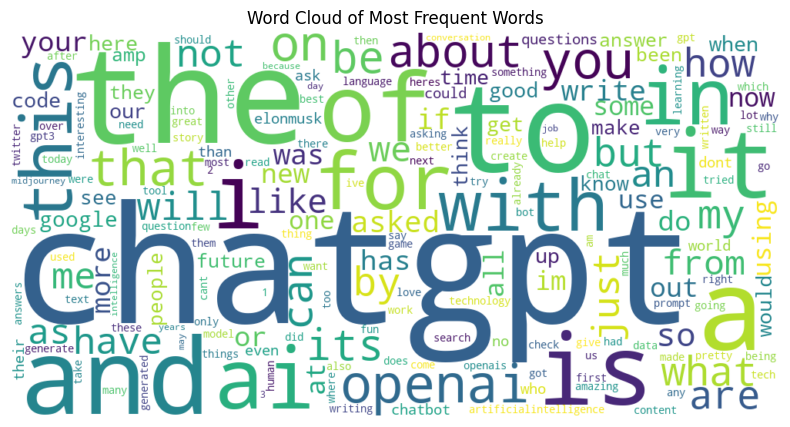

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary of word frequencies for the top 200 words
word_freq_dict = {word: count for word, count in top_200_words}

# Generate the word cloud of the most frequent words
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq_dict)

# Generate a word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()


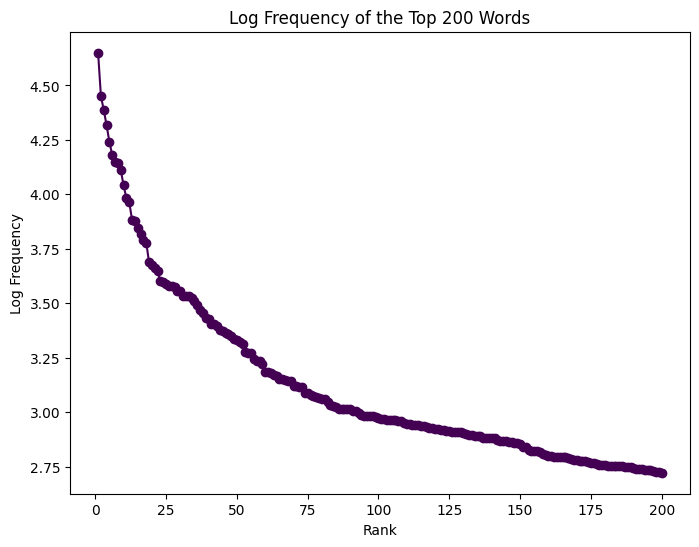

In [13]:
# Calculate the ranks of the words
ranks = list(range(1, len(top_200_words) + 1))

# Calculate the log of word frequencies
log_freq = [math.log10(freq) for freq in sizes]

# Plot the log-frequency against the rank
plt.figure(figsize=(8, 6))
plt.plot(ranks, log_freq, marker='o', linestyle='-', color='#440154FF')
plt.xlabel('Rank')
plt.ylabel('Log Frequency')
plt.title("Log Frequency of the Top 200 Words")
plt.show()


In what ways do you think the frequency of the words in this corpus differ from "all words in all corpora"?

Here are a few possible differences in which the frequency of words in this corpus differ from "all words in all corpora":

Domain-specific vocabulary: The corpus may contain words and terms that are specific to the keyword represented in the dataset (e.g., tweets about ChatGPT). This could result in a unique set of words that may not be commonly found in other corpora.

Informal language and abbreviations: Social media texts often include informal language, slang, and abbreviations that may not be present in other corpora. This can impact the frequency distribution and composition of words.

Topic-specific terminology: Depending on the subject matter of the tweets, the corpus may contain specialized terminology or jargon that is not prevalent in other corpora. This can contribute to variations in word frequencies.

Length and style of the text: Tweets typically have a limited character count, leading to concise and fragmented text. This brevity and unique style may influence the frequency distribution and prevalence of certain words.

